In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from pylab import rcParams
import matplotlib

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

df = pd.read_csv('/tera11/zhwei/students/Xionghui/data/run/0p1_exp1/csv/Global_budyko.csv')
df

,Unnamed: 0,lat,lon,Sbedrock,mask123,Proportion/Proportion4_median,Proportion/Proportion6_median,Proportion/Proportion7_median
0,1243113,-55.45,-68.65,834.754800,1.0,33.952110,-30.333336,30.554195
1,1250334,-55.25,-66.55,9.669006,1.0,59.508057,58.418045,56.394520
2,1253920,-55.15,-67.95,195.114100,1.0,47.404076,25.807009,50.889477
3,1253921,-55.15,-67.85,57.865448,1.0,47.439137,40.762040,48.636920
4,1261124,-54.95,-67.55,0.797073,1.0,76.369560,76.238760,94.110245
...,...,...,...,...,...,...,...,...
204482,5960778,75.55,97.85,18.478424,1.0,50.150814,44.827232,69.359390
204483,5964321,75.65,92.15,20.923874,1.0,59.442630,52.777290,75.018990
204484,5964353,75.65,95.35,52.938347,1.0,49.897938,34.778740,65.045430
204485,5967959,75.75,95.95,32.156340,1.0,52.616790,43.354880,64.662186


In [ ]:
print(df[df['']])

/tmp/ipykernel_3536220/1954744278.py:15: RuntimeWarning: divide by zero encountered in divide


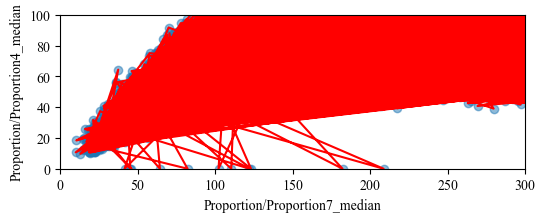

In [58]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(6, 2))

def exp_func(x, a):
    return 1 - np.exp(-a * x)

def func_2(x, a, b):
    return a * np.power(x, 2) + b * x

def func_3(x, a, b, c):
    return a * np.power(x, 3) + b * np.power(x, 2) + c * x 

def budyko(x, a):
    return a*np.power((x*np.tanh(1/x)*(1-np.exp(-x))),1/2)

# 假设我们拟合二次多项式，初始化参数可以随便给一个值
x = df['Proportion/Proportion7_median']
y = df['Proportion/Proportion4_median']

popt, pcov = curve_fit(budyko, x, y)


x_new = np.linspace(0, 300, 101)
y_new = budyko(x_new, *popt)

plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x, y, color='red', label=f'Fitted curve')
plt.xlabel('Proportion/Proportion7_median')
plt.ylabel('Proportion/Proportion4_median')
plt.ylim(0, 100)
plt.xlim(0, 300)

y1 = df['Proportion/Proportion6_median']

popt, pcov = curve_fit(func_3, x, y1)


y1_new = func_3(x_new, *popt)

# plt.scatter(x, y1, label='Data', alpha=0.5)

(0.0, 300.0)

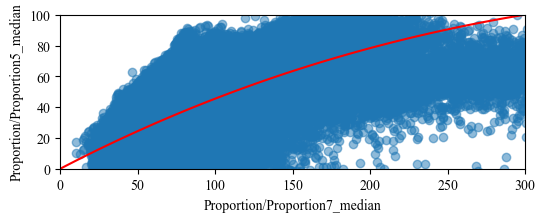

In [48]:
fig = plt.figure(figsize=(6, 2))

# 假设我们拟合二次多项式，初始化参数可以随便给一个值
y1 = df['Proportion/Proportion6_median']

popt, pcov = curve_fit(func_3, x, y1)


y1_new = func_3(x_new, *popt)

plt.scatter(x, y1, label='Data', alpha=0.5)
plt.plot(x_new, y1_new, color='red', label=f'Fitted curve')
plt.xlabel('Proportion/Proportion7_median')
plt.ylabel('Proportion/Proportion5_median')
plt.ylim(0, 100)
plt.xlim(0, 300)